In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rain Dataset 2.csv')


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              121 non-null    int64  
 1   Mean Temperature  121 non-null    float64
 2   Precipitation     121 non-null    float64
 3   Humidity          121 non-null    float64
 4   WindSpeed         121 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.9 KB


In [28]:
df.head()

,Year,Mean Temperature,Precipitation,Humidity,WindSpeed
0,1901,26.63,1344.89,93.82894,15.021105
1,1902,26.83,1150.76,94.19782,11.090103
2,1903,26.86,1222.17,94.83262,11.681987
3,1904,26.81,1155.25,96.47203,9.000000
4,1905,26.71,1262.99,97.11870,4.843305


In [17]:
df.to_csv('Rainfall_DataSet2')

In [29]:
df.head()


,Year,Mean Temperature,Precipitation,Humidity,WindSpeed
0,1901,26.63,1344.89,93.82894,15.021105
1,1902,26.83,1150.76,94.19782,11.090103
2,1903,26.86,1222.17,94.83262,11.681987
3,1904,26.81,1155.25,96.47203,9.000000
4,1905,26.71,1262.99,97.11870,4.843305


In [32]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [49]:
X = df.drop(columns=['Precipitation'])
Y = df[['Precipitation']]
Y = Y.values.reshape(-1, 1)

Year_index = 30
Years = [i for i in range(Y.size)]

clf = LinearRegression()
clf.fit(X, Y)

inp = np.array([[74], [60], [45], [67]])
inp = inp.reshape(1, -1)

print('The Precipitation for input is:', clf.predict(inp))

The Precipitation for input is: [[71.03487534]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


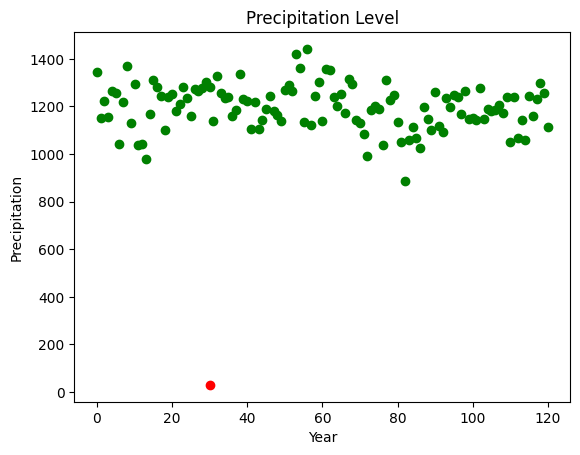

In [40]:
plt.scatter(Years, Y, color= 'g')
plt.scatter(Years[Year_index], Years[Year_index], color='r')
plt.title('Precipitation Level')
plt.xlabel('Year')
plt.ylabel('Precipitation')

plt.show()

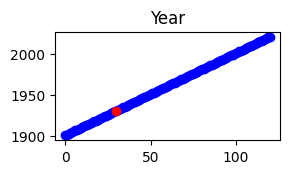

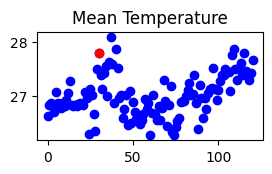

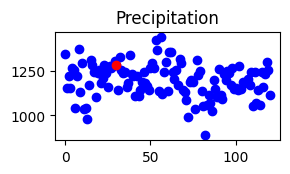

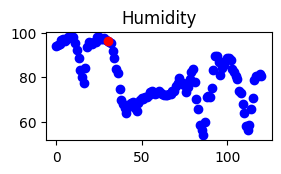

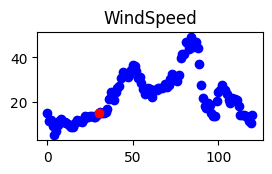

In [47]:
for i in range(df.columns.size):
  plt.subplot(3, 2, i+1)
  plt.scatter(Years, df[df.columns.values[i][:100]], color ='b')
  plt.scatter(Years[Year_index],df[df.columns.values[i]] [Year_index], color ='r')
  plt.title(df.columns.values[i])
  plt.show()

Mean Squared Error (MSE): 6450.366756426194
R-squared (R2): 0.03430271385658212
Mean Absolute Error (MAE): 63.705597058916744


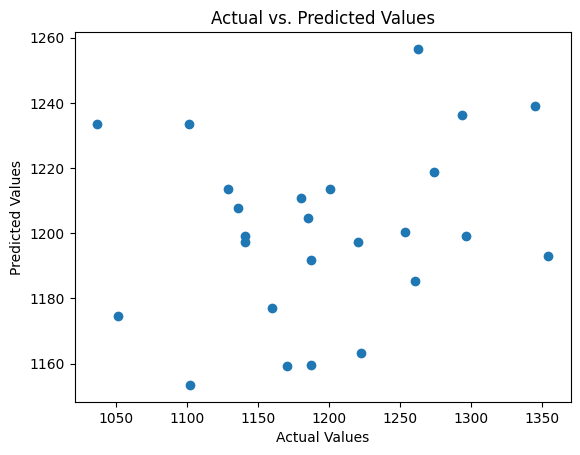

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have a dataset with features 'X' and target 'Y'
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
clf = LinearRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
